In [1]:
pip install pandas_ods_reader

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pandas_ods_reader import read_ods

In [3]:
base_path = "C:/Users/Елена/Documents/Labs/2_4_1.ods"
sheet_index = 1
df = read_ods(base_path , sheet_index)

In [4]:
df

,T grad,"h1,mm","h2,mm","delta_h,mm"
0,23.0,77.0,61.00,16.00
1,24.0,77.5,60.40,17.10
2,25.0,78.1,59.80,18.30
3,26.0,78.7,59.00,19.70
4,27.0,79.8,58.55,21.25
5,28.0,80.6,58.00,22.60
6,29.0,81.4,57.20,24.20
7,30.0,82.3,56.20,26.10
8,31.0,83.2,55.80,27.40
9,32.0,84.4,54.90,29.50


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
d_array = df.to_numpy()

In [7]:
d_array_T_r = d_array[1:13, 0]
d_array_T_f = d_array[13:25, 0]
d_array_h_r = d_array[1:13, 3]
d_array_h_f = d_array[13:25, 3]


In [8]:
d_array_h_f

array([35.3, 34.1, 31.5, 29.9, 28.3, 26.4, 24.7, 23.1, 22.0, 20.0, 18.3,
       16.0], dtype=object)

In [9]:
d_array_T_f

array([34.0, 33.0, 32.0, 31.0, 30.0, 29.0, 28.0, 27.0, 26.0, 25.0, 24.0,
       23.0], dtype=object)

In [10]:
d_array_T_r = d_array_T_r+273
d_array_T_f = d_array_T_f +273

In [11]:
d_array_T_f

array([307.0, 306.0, 305.0, 304.0, 303.0, 302.0, 301.0, 300.0, 299.0,
       298.0, 297.0, 296.0], dtype=object)

In [12]:
d_array_h_r_m = d_array_h_r*0.01 #переводим в метры 
d_array_h_f_m = d_array_h_f*0.01
d_array_1_T_r = d_array_T_r **(-1)#1/T
d_array_1_T_f = d_array_T_f**(-1)

In [13]:
d_array_1_T_r


array([0.003367003367003367, 0.003355704697986577, 0.0033444816053511705,
       0.0033333333333333335, 0.0033222591362126247,
       0.0033112582781456954, 0.0033003300330033004, 0.003289473684210526,
       0.003278688524590164, 0.0032679738562091504, 0.003257328990228013,
       0.003246753246753247], dtype=object)

In [14]:
q_mercury = 13596
g = 9.8

In [15]:
d_array_p_r = d_array_h_r_m *q_mercury*g#перевели в Па давление 
d_array_p_f = d_array_h_f_m*q_mercury*g
d_array_p_r_64 = d_array_p_r.astype(float) 
d_array_p_f_64 = d_array_p_f.astype(float)

In [16]:
np.around(d_array_p_r_64, decimals = 4)
np.around(d_array_p_f_64, decimals = 4)


array([47034.0024, 45435.1128, 41970.852 , 39838.9992, 37707.1464,
       35175.5712, 32910.4776, 30778.6248, 29312.976 , 26648.16  ,
       24383.0664, 21318.528 ])

In [17]:
len(d_array_T_f)

12

In [18]:
d_array_ln_p_r = np.log(d_array_p_r_64)# получили точки ln(p)
d_array_ln_p_f = np.log(d_array_p_f_64)

In [19]:
len(d_array_T_f)

12

In [20]:
from scipy import optimize
def test_func(x, a, b):
    return a*x + b
p0=[1,1]
params_r_1, params_covariance_r_1 = optimize.curve_fit(test_func, d_array_T_r, d_array_p_r_64,
                                               p0)
params_f_1, params_covariance_f_1 = optimize.curve_fit(test_func, d_array_T_f, d_array_p_f_64,
                                               p0)
params_1_r_1, params_covariance_1_r_1 = optimize.curve_fit(test_func, d_array_1_T_r, d_array_ln_p_r,
                                               p0)
params_1_f_1, params_covariance_1_f_1 = optimize.curve_fit(test_func, d_array_1_T_f, d_array_ln_p_f,
                                               p0)


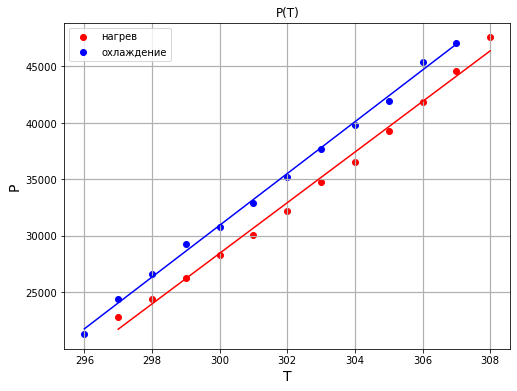

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("P(T)", fontsize=12)
ax.set_xlabel("T", fontsize=14)
ax.set_ylabel("P", fontsize=14)
ax.grid(which="major", linewidth=1.2)
#ax.set_ylim(0.01, 0.3)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
ax.scatter(d_array_T_r,d_array_p_r_64, c="red",label = "нагрев" )
ax.scatter(d_array_T_f,d_array_p_f_64, c="blue",label = "охлаждение" )

ax.plot(d_array_T_r, test_func(d_array_T_r, params_r_1[0], params_r_1[1]),c="red")
ax.plot(d_array_T_f, test_func(d_array_T_f, params_f_1[0], params_f_1[1]),c="blue")
#ax.errorbar(d_array_T, d_array_Sig, xerr=0, yerr=0.03, c="green")
#plt.fill_between(d_array_T, -0.00012166*d_array_T+0.03, -0.00012166*d_array_T+0.03, alpha=0.3)
ax.legend()
#ax.tick_params(which='major', length=10, width=2)
#ax.tick_params(which='minor', length=5, width=1)
plt.show()

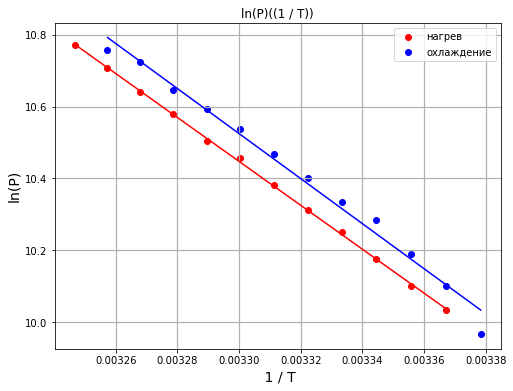

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("ln(P)((1 / T))", fontsize=12)
ax.set_xlabel(" 1 / T", fontsize=14)
ax.set_ylabel("ln(P)", fontsize=14)
ax.grid(which="major", linewidth=1.2)
#ax.set_ylim(0.01, 0.3)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
ax.scatter(d_array_1_T_r,d_array_ln_p_r, c="red",label = "нагрев" )
ax.scatter(d_array_1_T_f,d_array_ln_p_f, c="blue",label = "охлаждение" )

ax.plot(d_array_1_T_r, test_func(d_array_1_T_r, params_1_r_1[0], params_1_r_1[1]),c="red")
ax.plot(d_array_1_T_f, test_func(d_array_1_T_f, params_1_f_1[0], params_1_f_1[1]),c="blue")
#ax.errorbar(d_array_T, d_array_Sig, xerr=0, yerr=0.03, c="green")
#plt.fill_between(d_array_T, -0.00012166*d_array_T+0.03, -0.00012166*d_array_T+0.03, alpha=0.3)
ax.legend()
#ax.tick_params(which='major', length=10, width=2)
#ax.tick_params(which='minor', length=5, width=1)
plt.show()

In [23]:
covariance_errors = [params_covariance_r_1[0][0],params_covariance_f_1[0][0],params_covariance_1_r_1[0][0],params_covariance_1_f_1[0][0]]
covariance_errors = np.array(covariance_errors)

In [24]:
covariance_errors

array([ 3414.78650363,  1334.80400795,  1718.7076869 , 49356.54877068])

In [25]:
d_p_d_T = [params_r_1[0],params_f_1[0]]
d_p_d_T  = np.array(d_p_d_T )
d_ln_p_d_1_T = [params_1_r_1[0],params_1_f_1[0]]
d_ln_p_d_1_T  = np.array(d_ln_p_d_1_T )


In [26]:
#Константы 
R = 8.31
sigma_p = 0.05*0.001*q_mercury*g

In [51]:
#Посчитаем L - теплоту испарения
#____по формуле L = - R(d_ln(p)/d_(1/T))

L_2_r = (-1)*R*(d_ln_p_d_1_T[0]) #нагрева
L_2_f = (-1)*R*(d_ln_p_d_1_T[1]) #охлаждения


L_2 = (L_2_r + L_2_f)/2   #Посчитаем среднее L_2)))

#Посчитаем L - теплоту испарения
#____по формуле L = (R*T^2/P)(d_p/d_T)

L_1_r = (R*np.power(d_array_T_r,2)/d_array_p_r_64)*d_p_d_T[0] 
L_1_f = (R*np.power(d_array_T_f,2)/d_array_p_f_64)*d_p_d_T[1]

#технические шоколадки
import pandas as pd
L_1_f = pd.to_numeric(L_1_f,errors = 'coerce')


L_1 = (sum(L_1_r)+sum(L_1_f))/(len(L_1_f)+len(L_1_r)) #Посчитаем среднее L)))




In [52]:
L_1

52739.976607173296

In [54]:
L_2

51411.232809995614

In [39]:
#То, что я не люблю больше всего - погрешности(((
#_______для L1 по формуле delta_L = sqrt( ((R*T^2*(d_p/d_T)/P^2)*d_p )^2 + ((R*T^2/P) *d(d_p/d_T))^2 )


# Для нагрева 
delta_L_1 = np.sqrt(pd.to_numeric(np.power((R*np.power(d_array_T_r,2)*(d_p_d_T[0])/np.power(d_array_p_r_64,2))*sigma_p,2),errors = 'coerce') + pd.to_numeric(np.power((R*np.power(d_array_T_r,2)/d_array_p_r_64)*(covariance_errors[0])**0.5,2),errors = 'coerce'))
# Для охлаждения  
delta_L_2 = np.sqrt(pd.to_numeric(np.power((R*np.power(d_array_T_f,2)*(d_p_d_T[1])/np.power(d_array_p_f_64,2))*sigma_p,2),errors = 'coerce') + pd.to_numeric(np.power((R*np.power(d_array_T_f,2)/d_array_p_f_64)*np.sqrt(covariance_errors[1]),2),errors = 'coerce'))

#Погрешность тоже возьмём как среднее по двум массивам, всё честно, гарантирую
D_L_1 = (sum(delta_L_1)+sum(delta_L_2))/(len(delta_L_1)+len(delta_L_2))



In [41]:
#_______для L2 по формуле погрешностью будет корень диагонального элемента кавариационной матрицы - погрешность экстраполяции
D_L_2 = (np.sqrt(covariance_errors[2]) + np.sqrt(covariance_errors[3]))/2

In [55]:
D_L_1

1107.0252323059206

In [42]:
D_L_2


131.8103188023741

In [ ]:

#Сравнение полученных результатов с табличными данными
#Этого лучше не делать, но посмеяться и поплакать хочется 
# Итак, табличные значения в студию:
# L = 40.2кДж
#Мы имеем:

L_1 = 52739.976607173296 +-1107.0252323059206
L_2 = 51411.232809995614 +-131.8103188023741

#По погрешности мы можем заметить, что второй метод вычисления гораздо точнее, но что нам от точности,
# если он всё равно на 20% больше табличной величины
#виноват термостат, отвечаю










